Seja a equação de resistência à pressão interna ($P_{i}$) de um cilindro de parede fina, conhecida como Equação de Barlow, dada por $P_{i} = \dfrac{2 Y_{p} t}{D}$, na qual $Y_{p}$ é a tensão de escoamento do material, $D$ e $t$ representam o diâmetro externo e a espessura do tubo, respectivamente. Assumindo-se os parâmetros e distribuições da tabela abaixo, pede-se:

| **Variável**  | **Média** | **COV** | **Distribuição** |
|---------------|-----------|---------|:----------------:|
| $Y_{p}$ (psi) | 96800     | 0,0531  |      Normal      |
| $D$ (pol)     | 10,8263   | 0,0019  |     Lognormal    |
| $t$ (pol)     | 0,8024    | 0,0217  |      Normal      |

a) Traçar as PDFs marginais das v.a. $D$ e $t$, e sua PDF conjunta, admitindo-as independentes;

b) Estimar o valor médio e a variância de $P_{i}$, por expansão em série de Taylor.

# Resolução

## Item a)

Para ambas as variáveis, temos a média e o coeficiente de variação, para obtermos o valor do desvio padrão basta multiplicarmos o coeficiente de variação pela média.

### PDFs marginais do Diâmetro (distribuição Lognormal) e Espessura (distribuição normal)

Para obter a PDF da distribuição lognormal para o caso em que temos a média ($\mu$) e o desvio padrão ($\sigma$) precisamos obter os parâmetros dessa distribuição resolvendo o seguinte sistema:

$$
\left\{\begin{array}{lr}
    \mu \sqrt{e^{\xi^{2}} - 1} = \sigma \\
    e^{\left( \lambda + \dfrac{1}{2} \xi^{2} \right)} = \mu
\end{array}\right.
$$

Analiticamente, obtemos a solução para $\xi$ e $\lambda$ com as seguintes expressões:

$$
\xi = \sqrt{\ln \left( \dfrac{\mu^{2} + \sigma^{2}}{\mu^{2}} \right)}
$$

$$
\lambda = - \dfrac{1}{2} \xi^{2} + \ln(\mu)
$$

Na @fig-plot-marginal-d e @fig-plot-marginal-t são apresentados os gráficos das PDFs marginais do diâmetro e espessura, respectivamente.

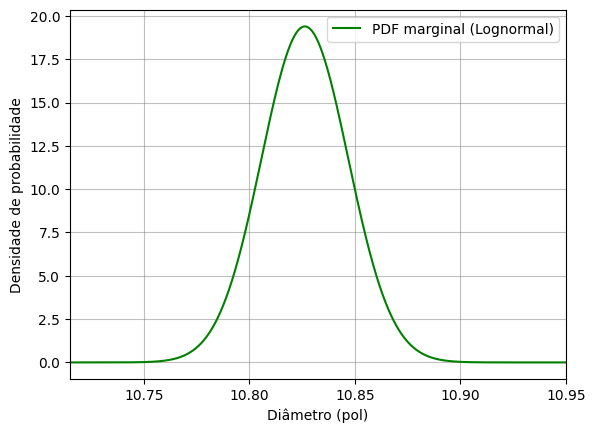

In [31]:
#| label: fig-plot-marginal-d
#| fig-cap: Densidade de probabilidade marginal do diâmetro

import numpy as np
import matplotlib.pyplot as plt

mean_D = 10.8263
COV_D = 0.0019
std_D = COV_D * mean_D

ksi = np.sqrt(np.log((mean_D**2 + std_D**2)/mean_D**2))
lbd = -0.5 * ksi ** 2 + np.log(mean_D)

def D_lognorm(x):
    return (
        1 / (np.sqrt(2 * np.pi) * ksi * x) * np.exp(-0.5 * ((np.log(x) - lbd) / ksi) ** 2)
    )

xi_D, xf_D = 10.715, 10.950

x_lognorm = np.linspace(xi_D, xf_D, 1000)

fig, ax = plt.subplots()
ax.plot(x_lognorm, D_lognorm(x_lognorm), label="PDF marginal (Lognormal)", color="green")
ax.grid(True, color="gray", alpha=0.5)
ax.legend(loc="best")
ax.set_xlabel("Diâmetro (pol)")
ax.set_ylabel("Densidade de probabilidade")
ax.set_xlim(xi_D, xf_D);

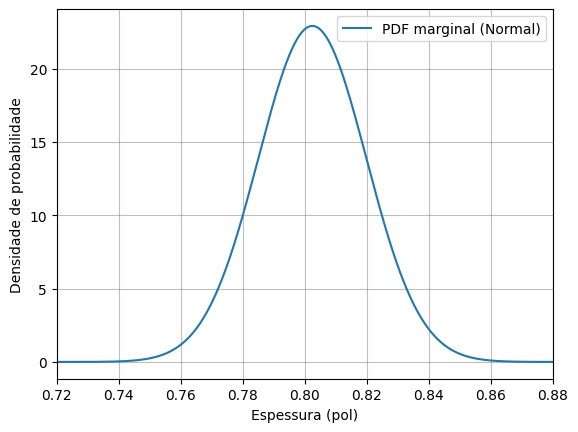

In [33]:
#| label: fig-plot-marginal-t
#| fig-cap: Densidade de probabilidade marginal da espessura

import numpy as np
import matplotlib.pyplot as plt


mean_t = 0.8024
COV_t = 0.0217
std_t = COV_t * mean_t

def t_norm(x):
    return (
        1 / (std_t * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean_t) / std_t) ** 2)
    )

xi_t, xf_t = 0.72, 0.88  

x_norm = np.linspace(xi_t, xf_t, 1000)

fig, ax = plt.subplots()
ax.plot(x_norm, t_norm(x_norm), label="PDF marginal (Normal)")
ax.grid(True, color="gray", alpha=0.5)
ax.legend(loc="best")
ax.set_xlabel("Espessura (pol)")
ax.set_ylabel("Densidade de probabilidade")
ax.set_xlim(xi_t, xf_t);

### PDF conjunta

Admitindo as variáveis como independentes, a PDF conjunta é obtida pelo produto entre as PDFs marginais.

Na @fig-pdf-conjunta é apresentado o gráfico da PDF conjunta do diâmetro e espessura

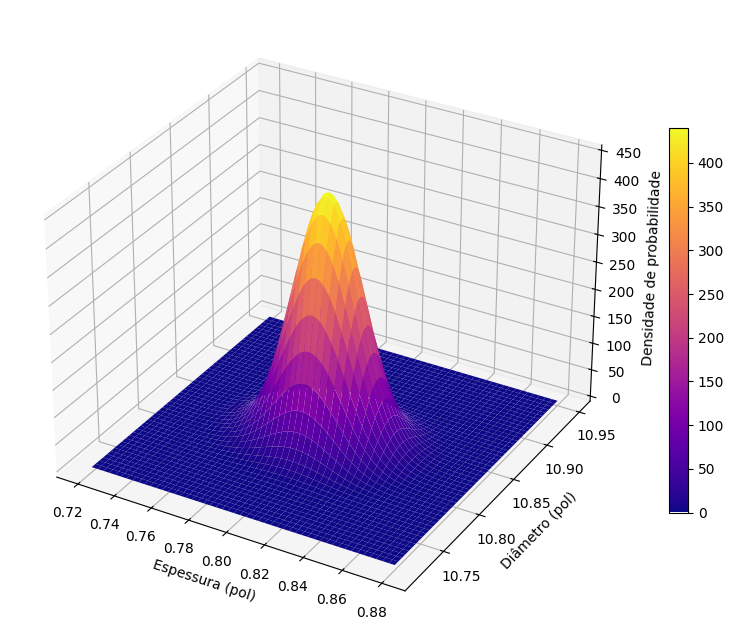

In [35]:
#| label: fig-pdf-conjunta
#| fig-cap: Densidade de probabilidade conjunta do diâmetro e da espessura

import matplotlib.pyplot as plt

x_norm = np.linspace(xi_t, xf_t, 1000)
x_lognorm = np.linspace(xi_D, xf_D, 1000)

X, Y = np.meshgrid(x_norm, x_lognorm)
Z = t_norm(X) * D_lognorm(Y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma')
fig.colorbar(surf, shrink=0.5)
ax.set_xlabel("Espessura (pol)")
ax.set_ylabel("Diâmetro (pol)")
ax.set_zlabel("Densidade de probabilidade")
ax.set_zlim(0, 450);